In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

In [32]:
#Dataset
df = pd.read_csv("Pre-processingDataset (1).csv", encoding="latin1")

In [33]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Year,Product,Premium_Bin,Age_Generation
0,1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,2019,Critical Illness Coverage,Extremely High,Silent
1,2,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,2019,Vision Exams and Eyewear,Extremely High,Gen Z
2,3,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,2019,"Prescription Drugs Coverage, Hospitalization C...",Extremely High,Millennials
3,4,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0,2019,"Surgery Coverage, Emergency Room Visits, Mater...",Very Low,Gen Z
4,5,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0,2019,"Pediatric Services, Physical Therapy Coverage",Very High,Gen Z


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
 12  Year                  381109 non-null  int64 
 13  Product               381109 non-null  object
 14  Premium_Bin           381109 non-null  object
 15  Age_Generation   

In [37]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Year
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563,2020.982278
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936,1.411540
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,2019.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000,2020.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000,2021.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,2022.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,2023.000000


In [39]:
df.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage,Product,Premium_Bin,Age_Generation
count,381109,381109,381109,381109,381109,381109
unique,2,3,2,229,6,5
top,Male,1-2 Year,Yes,"Pediatric Services, Physical Therapy Coverage",Extremely High,Millennials
freq,206089,200316,192413,24103,280146,115587


In [40]:
df_unique = df.drop(columns = 'id')

for column in df_unique.columns:
    print(f"{column}: ")
    print("")
    print(df_unique[column].unique())
    print("")

Gender: 

['Male' 'Female']

Age: 

[76 21 29 24 23 32 41 71 25 42 65 49 44 34 26 79 48 45 72 30 54 27 38 56
 51 22 78 20 39 62 58 59 60 63 50 67 77 28 69 52 31 33 37 36 47 53 70 55
 40 75 64 57 35 43 46 66 68 73 84 61 83 81 74 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[ 3 11 41 33  6 50 15 28 45 35  8 36 30 26 16 47 48 19 39 23 37  5 17  2
  7 29 46 27 25 13 20 49 22  0  9 31 12 34 21 10 14 18 24 40 43 38 32 44
  4 51 42  1 52]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['1-2 Year' '< 1 Year' '> 2 Years']

Vehicle_Damage: 

['No' 'Yes']

Annual_Premium: 

[33536 28619 27496 ... 52918 67320 69184]

Policy_Sales_Channel: 

[ 26 152 160  14  13  30 124 163 122  19  22  15 156 154  16  52 155  11
 151 125  25  61   1  86 157 150  23  60  21   3 139  12  29  55   7  47
 127 153  78  89  32   8  10 120  65   4  42  83 136  18  56  48  93 116
  91  45   9 158 145 147  24  44 109  37 140 128 114 118 159 119 105  31
 107 135  62 138 131 129  88 111 113  73  36  28  35  59  53 148 1

In [42]:
#Check missing value
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Year                    0
Product                 0
Premium_Bin             0
Age_Generation          0
dtype: int64

In [43]:
#Drop unnecessary columns
df.drop(['Year', 'Product', 'Premium_Bin', 'Age_Generation', 'id'], axis=1, inplace=True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
1,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
2,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
3,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0
4,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0


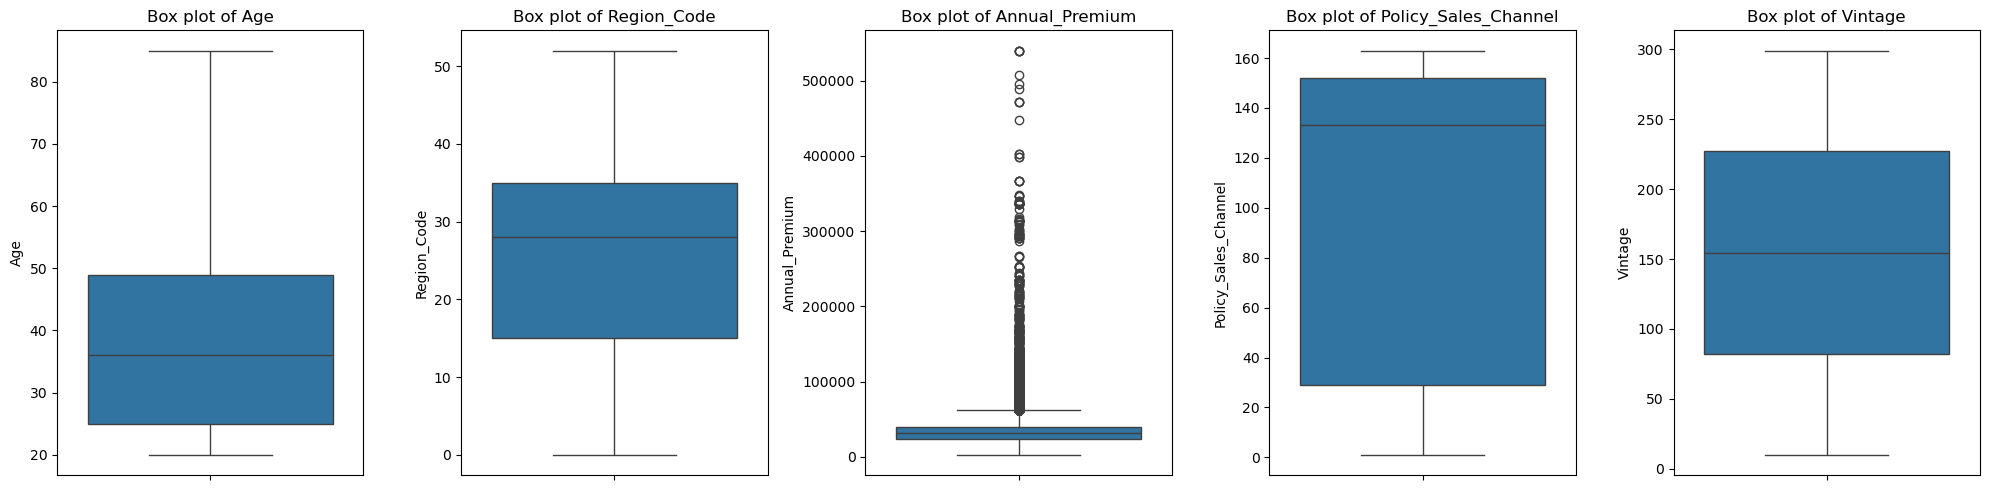

In [44]:
numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

plt.figure(figsize=(20, 5))

for i, col in enumerate(numerical_columns):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

**Encoding Object**

**1. Gender**

In [51]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,76,1,3,0,1-2 Year,No,33536,26,183,0
1,0,21,1,11,1,< 1 Year,No,28619,152,203,0
2,1,29,1,41,1,< 1 Year,No,27496,152,39,0
3,1,24,1,33,0,< 1 Year,Yes,2630,160,176,0
4,0,23,1,11,0,< 1 Year,Yes,23367,152,249,0


**2. Vehicle Damage**

In [53]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,76,1,3,0,1-2 Year,0,33536,26,183,0
1,0,21,1,11,1,< 1 Year,0,28619,152,203,0
2,1,29,1,41,1,< 1 Year,0,27496,152,39,0
3,1,24,1,33,0,< 1 Year,1,2630,160,176,0
4,0,23,1,11,0,< 1 Year,1,23367,152,249,0


**3.Vehicle Age**

In [58]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,76,1,3,0,1,0,33536,26,183,0
1,0,21,1,11,1,0,0,28619,152,203,0
2,1,29,1,41,1,0,0,27496,152,39,0
3,1,24,1,33,0,0,1,2630,160,176,0
4,0,23,1,11,0,0,1,23367,152,249,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Gender                381109 non-null  int64
 1   Age                   381109 non-null  int64
 2   Driving_License       381109 non-null  int64
 3   Region_Code           381109 non-null  int64
 4   Previously_Insured    381109 non-null  int64
 5   Vehicle_Age           381109 non-null  int64
 6   Vehicle_Damage        381109 non-null  int64
 7   Annual_Premium        381109 non-null  int64
 8   Policy_Sales_Channel  381109 non-null  int64
 9   Vintage               381109 non-null  int64
 10  Response              381109 non-null  int64
dtypes: int64(11)
memory usage: 32.0 MB


**Feature Engineering and Feature Selection**


In [63]:
X = df.drop(columns = [ 'Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'])
y = df['Response']

**Model Building**


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

**SMOTE**

In [69]:
sm = SMOTE(random_state = 42)
X_train.head()

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium
332803,70,1,1,0,85060
116248,21,1,0,0,30421
255005,27,1,0,0,37387
317474,34,0,2,1,28552
344212,40,0,1,1,2630


In [71]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [85]:
# Display the distribution of the target variable in the testing set
print("Testing set distribution:")
print(y_test.value_counts())

Testing set distribution:
Response
0    66892
1     9330
Name: count, dtype: int64


In [87]:
# Display the distribution of the target variable in the initial dataset
print("Initial dataset distribution:")
print(df['Response'].value_counts())

# Display the distribution of the target variable in the testing set
print("Testing set distribution:")
print(y_test.value_counts())

# Display the distribution of the target variable after SMOTE
print("Training set distribution:")
print(y_train_sm.value_counts())

Initial dataset distribution:
Response
0    334399
1     46710
Name: count, dtype: int64
Testing set distribution:
Response
0    66892
1     9330
Name: count, dtype: int64
Training set distribution:
Response
0    267507
1    267507
Name: count, dtype: int64


**1. Logistic Regression**

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66892
           1       0.25      0.98      0.40      9330

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

          Predicted 1  Predicted 0
Actual 1         9097          233
Actual 0        27410        39482


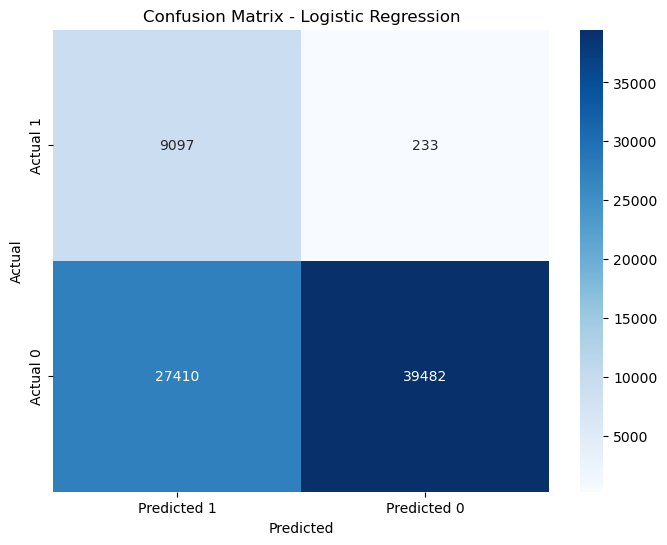

In [90]:
# Logistic Regression model
modelSMOTE_logreg = LogisticRegression()
modelSMOTE_logreg.fit(X_train_sm, y_train_sm)

# Predicting using the Logistic Regression model
y_pred_SMOTE_logreg = modelSMOTE_logreg.predict(X_test)

# Calculating evaluation metrics
acc_logreg = accuracy_score(y_test, y_pred_SMOTE_logreg)
recall_logreg = recall_score(y_test, y_pred_SMOTE_logreg)
prec_logreg = precision_score(y_test, y_pred_SMOTE_logreg)
f1_logreg = f1_score(y_test, y_pred_SMOTE_logreg)

# Printing the classification report
print("--- Logistic Regression ---")
print(classification_report(y_test, y_pred_SMOTE_logreg))

# Compute confusion matrix
cm_smote_log_reg = confusion_matrix(y_test, y_pred_SMOTE_logreg, labels=[1, 0])

# Create DataFrame for confusion matrix
df_smote_logreg = pd.DataFrame(data=cm_smote_log_reg, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame
print(df_smote_logreg)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_smote_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC AUC: 0.8267


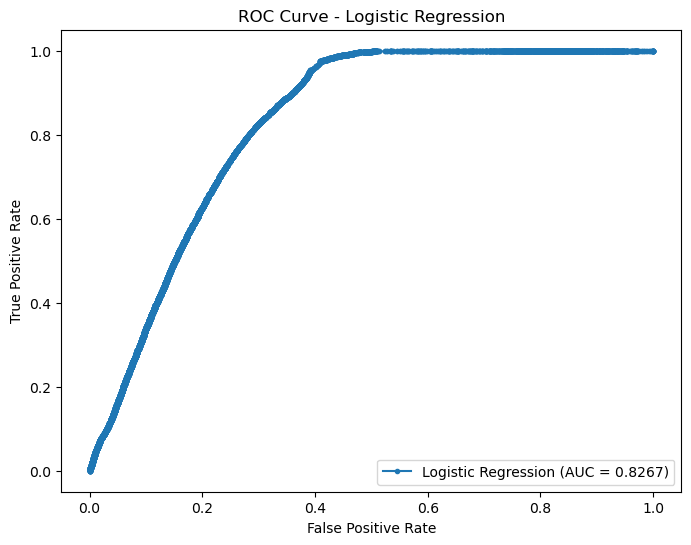

Sensitivity (Recall): 0.5902
Specificity: 0.9750


In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC
y_prob_logreg = modelSMOTE_logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)

# Print ROC AUC
print(f"ROC AUC: {roc_auc_logreg:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %0.4f)' % roc_auc_logreg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity
tn, fp, fn, tp = cm_smote_log_reg.ravel()
sensitivity = tp / (tp + fn)  # Recall
specificity = tn / (tn + fp)

# Print Sensitivity and Specificity
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66892
           1       0.25      0.98      0.40      9330

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1         9097          233
Actual 0        27410        39482


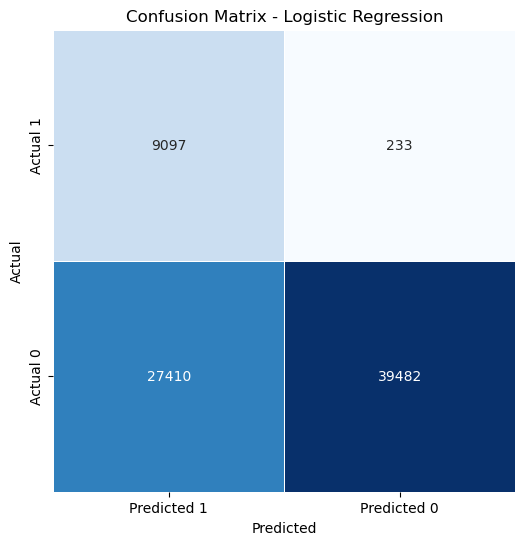

ROC AUC: 0.8267


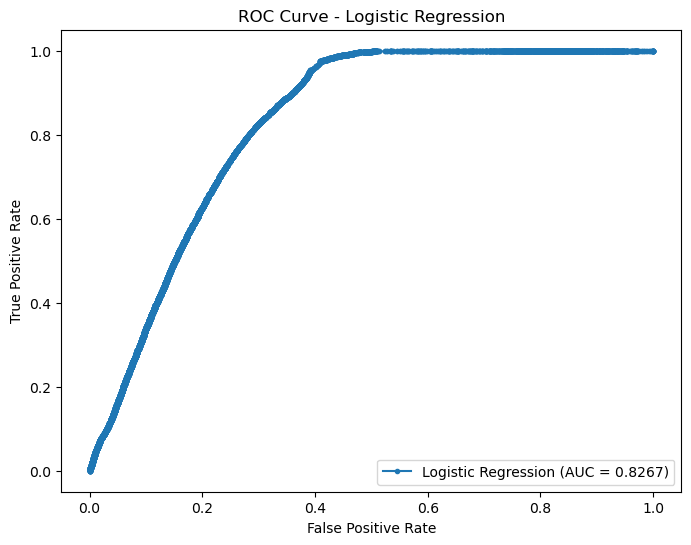

Sensitivity (Recall): 0.5902
Specificity: 0.9750


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

# Logistic Regression model
modelSMOTE_logreg = LogisticRegression()
modelSMOTE_logreg.fit(X_train_sm, y_train_sm)

# Predicting using the Logistic Regression model
y_pred_SMOTE_logreg = modelSMOTE_logreg.predict(X_test)

# Calculating evaluation metrics
acc_logreg = accuracy_score(y_test, y_pred_SMOTE_logreg)
recall_logreg = recall_score(y_test, y_pred_SMOTE_logreg)
prec_logreg = precision_score(y_test, y_pred_SMOTE_logreg)
f1_logreg = f1_score(y_test, y_pred_SMOTE_logreg)

# Printing the classification report
print("--- Logistic Regression ---")
print(classification_report(y_test, y_pred_SMOTE_logreg))

# Compute confusion matrix
cm_smote_log_reg = confusion_matrix(y_test, y_pred_SMOTE_logreg, labels=[1, 0])

# Create DataFrame for confusion matrix
df_smote_logreg = pd.DataFrame(data=cm_smote_log_reg, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame
print("Confusion Matrix:")
print(df_smote_logreg)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_smote_logreg, annot=True, fmt='d', cmap='Blues', 
            cbar=False, square=True, linewidths=0.5)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC
y_prob_logreg = modelSMOTE_logreg.predict_proba(X_test)[:, 1] 
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)

# Print ROC AUC
print(f"ROC AUC: {roc_auc_logreg:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %0.4f)' % roc_auc_logreg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity
tn, fp, fn, tp = cm_smote_log_reg.ravel()
sensitivity = tp / (tp + fn) 
specificity = tn / (tn + fp)

# Print Sensitivity and Specificity
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66892
           1       0.25      0.98      0.40      9330

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

          Predicted 1  Predicted 0
Actual 1         9097          233
Actual 0        27410        39482


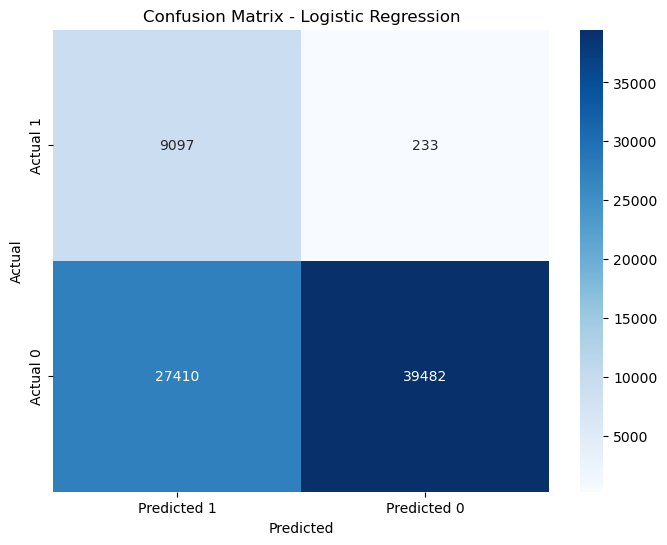

ROC AUC: 0.8267


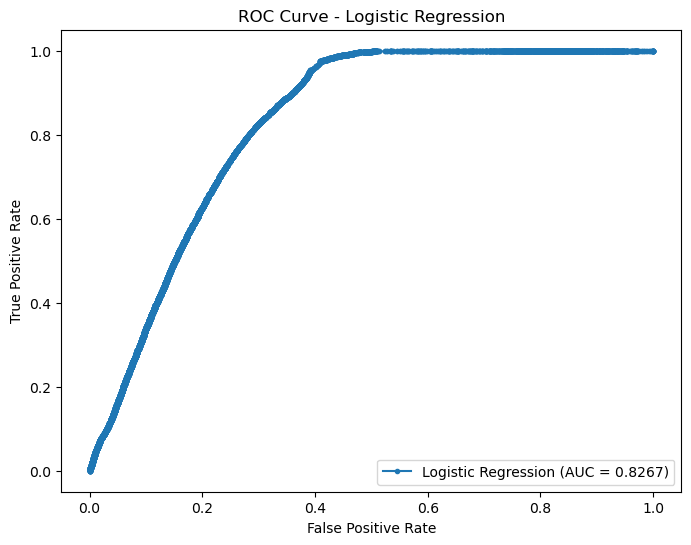

Sensitivity (Recall): 0.5902
Specificity: 0.9750


In [60]:
# Logistic Regression model
modelSMOTE_logreg = LogisticRegression()
modelSMOTE_logreg.fit(X_train_sm, y_train_sm)

# Predicting using the Logistic Regression model
y_pred_SMOTE_logreg = modelSMOTE_logreg.predict(X_test)

# Calculating evaluation metrics
acc_logreg = accuracy_score(y_test, y_pred_SMOTE_logreg)
recall_logreg = recall_score(y_test, y_pred_SMOTE_logreg)
prec_logreg = precision_score(y_test, y_pred_SMOTE_logreg)
f1_logreg = f1_score(y_test, y_pred_SMOTE_logreg)

# Printing the classification report
print("--- Logistic Regression ---")
print(classification_report(y_test, y_pred_SMOTE_logreg))

# Compute confusion matrix
cm_smote_log_reg = confusion_matrix(y_test, y_pred_SMOTE_logreg, labels=[1, 0])

# Create DataFrame for confusion matrix
df_smote_logreg = pd.DataFrame(data=cm_smote_log_reg, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame
print(df_smote_logreg)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_smote_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC
y_prob_logreg = modelSMOTE_logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)

# Print ROC AUC
print(f"ROC AUC: {roc_auc_logreg:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %0.4f)' % roc_auc_logreg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity
tn, fp, fn, tp = cm_smote_log_reg.ravel()
sensitivity = tp / (tp + fn)  # Recall
specificity = tn / (tn + fp)

# Print Sensitivity and Specificity
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

**2. KNN Classifier**

--- KNN Classifier ---
              precision    recall  f1-score   support

           0       0.90      0.76      0.82     66892
           1       0.19      0.41      0.26      9330

    accuracy                           0.72     76222
   macro avg       0.55      0.59      0.54     76222
weighted avg       0.82      0.72      0.76     76222

          Predicted 1  Predicted 0
Actual 1         3839         5491
Actual 0        16114        50778


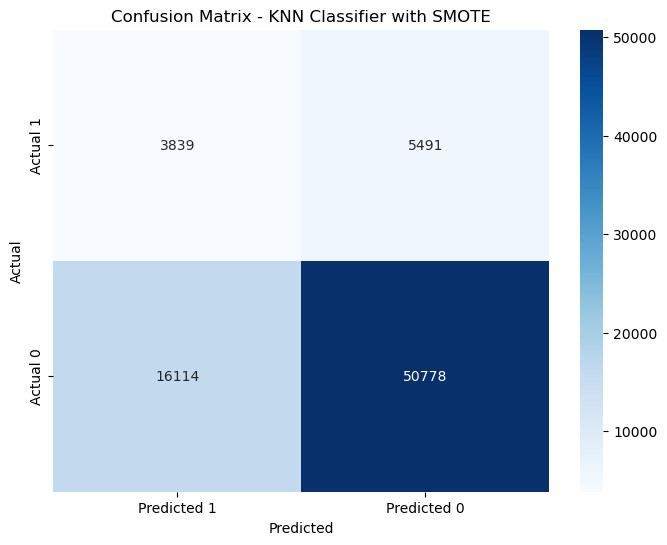

ROC AUC: 0.6396


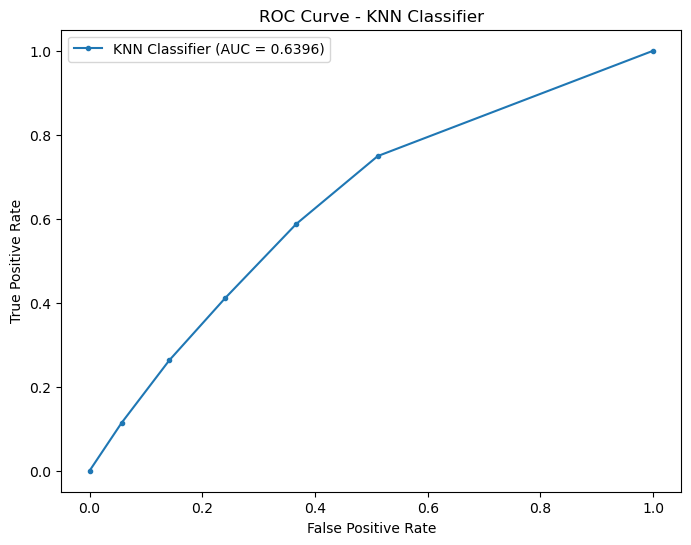

Sensitivity (Recall): 0.7591
Specificity: 0.4115


In [63]:
# KNN Classifier model
modelSMOTE_KNN = KNeighborsClassifier()
modelSMOTE_KNN.fit(X_train_sm, y_train_sm)

# Predicting using the KNN Classifier model
y_pred_SMOTE_KNN = modelSMOTE_KNN.predict(X_test)

# Calculating evaluation metrics for KNN Classifier
acc_KNN = accuracy_score(y_test, y_pred_SMOTE_KNN)
recall_KNN = recall_score(y_test, y_pred_SMOTE_KNN)
prec_KNN = precision_score(y_test, y_pred_SMOTE_KNN)
f1_KNN = f1_score(y_test, y_pred_SMOTE_KNN)

# Printing the classification report for KNN Classifier
print("--- KNN Classifier ---")
print(classification_report(y_test, y_pred_SMOTE_KNN))

# Compute confusion matrix for KNN Classifier
cm_smote_KNN = confusion_matrix(y_test, y_pred_SMOTE_KNN, labels=[1, 0])

# Create DataFrame for confusion matrix for KNN Classifier
df_smote_KNN = pd.DataFrame(data=cm_smote_KNN, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame for KNN Classifier
print(df_smote_KNN)

# Plotting the heatmap for KNN Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(df_smote_KNN, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN Classifier with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC for KNN Classifier
y_prob_KNN = modelSMOTE_KNN.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc_KNN = roc_auc_score(y_test, y_prob_KNN)

# Calculate ROC curve for KNN Classifier
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_prob_KNN)

# Print ROC AUC for KNN Classifier
print(f"ROC AUC: {roc_auc_KNN:.4f}")

# Plot ROC Curve for KNN Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_KNN, tpr_KNN, marker='.', label='KNN Classifier (AUC = %0.4f)' % roc_auc_KNN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity for KNN Classifier
tn_KNN, fp_KNN, fn_KNN, tp_KNN = cm_smote_KNN.ravel()
sensitivity_KNN = tp_KNN / (tp_KNN + fn_KNN)  # Recall
specificity_KNN = tn_KNN / (tn_KNN + fp_KNN)

# Print Sensitivity and Specificity for KNN Classifier
print(f"Sensitivity (Recall): {sensitivity_KNN:.4f}")
print(f"Specificity: {specificity_KNN:.4f}")

**3. Decision Tree**

--- Decision Tree Classifier ---
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     66892
           1       0.27      0.57      0.36      9330

    accuracy                           0.75     76222
   macro avg       0.60      0.68      0.61     76222
weighted avg       0.85      0.75      0.79     76222

          Predicted 1  Predicted 0
Actual 1         5355         3975
Actual 0        14761        52131


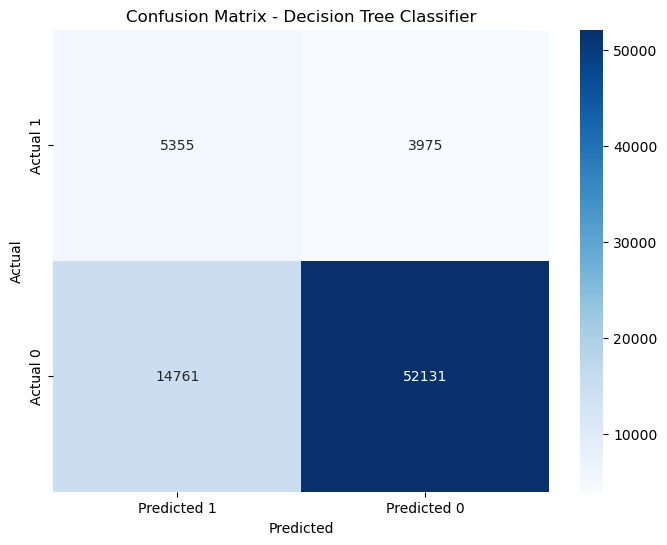

ROC AUC: 0.6833


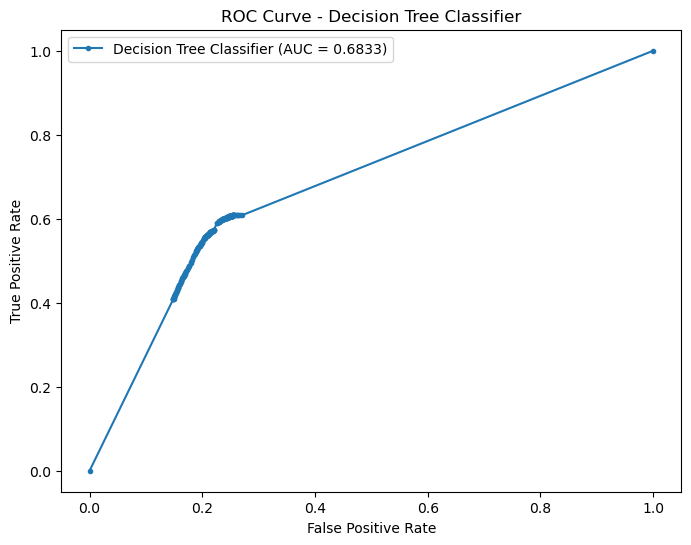

Sensitivity (Recall): 0.7793
Specificity: 0.5740


In [66]:
# Decision Tree Classifier model
modelSMOTE_DT = DecisionTreeClassifier()
modelSMOTE_DT.fit(X_train_sm, y_train_sm)

# Predicting using the Decision Tree Classifier model
y_pred_SMOTE_DT = modelSMOTE_DT.predict(X_test)

# Calculating evaluation metrics
acc_DT = accuracy_score(y_test, y_pred_SMOTE_DT)
recall_DT = recall_score(y_test, y_pred_SMOTE_DT)
prec_DT = precision_score(y_test, y_pred_SMOTE_DT)
f1_DT = f1_score(y_test, y_pred_SMOTE_DT)

# Printing the classification report
print("--- Decision Tree Classifier ---")
print(classification_report(y_test, y_pred_SMOTE_DT))

# Compute confusion matrix
cm_smote_DT = confusion_matrix(y_test, y_pred_SMOTE_DT, labels=[1, 0])

# Create DataFrame for confusion matrix
df_smote_DT = pd.DataFrame(data=cm_smote_DT, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame
print(df_smote_DT)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_smote_DT, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC
y_prob_DT = modelSMOTE_DT.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc_DT = roc_auc_score(y_test, y_prob_DT)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_DT)

# Print ROC AUC
print(f"ROC AUC: {roc_auc_DT:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Decision Tree Classifier (AUC = %0.4f)' % roc_auc_DT)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity
tn, fp, fn, tp = cm_smote_DT.ravel()
sensitivity = tp / (tp + fn)  # Recall
specificity = tn / (tn + fp)

# Print Sensitivity and Specificity
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

**4. Random Forest Classifier**

--- Random Forest Classifier ---
              precision    recall  f1-score   support

           0       0.94      0.76      0.84     66892
           1       0.27      0.63      0.37      9330

    accuracy                           0.74     76222
   macro avg       0.60      0.69      0.61     76222
weighted avg       0.85      0.74      0.78     76222

          Predicted 1  Predicted 0
Actual 1         5858         3472
Actual 0        16126        50766


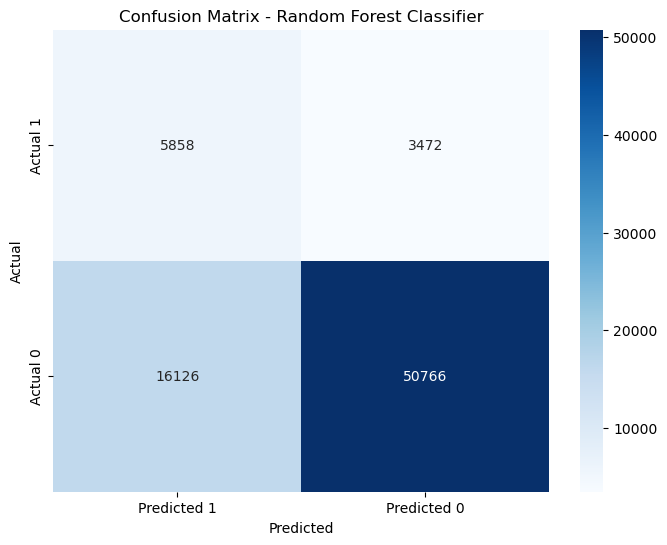

ROC AUC: 0.7969


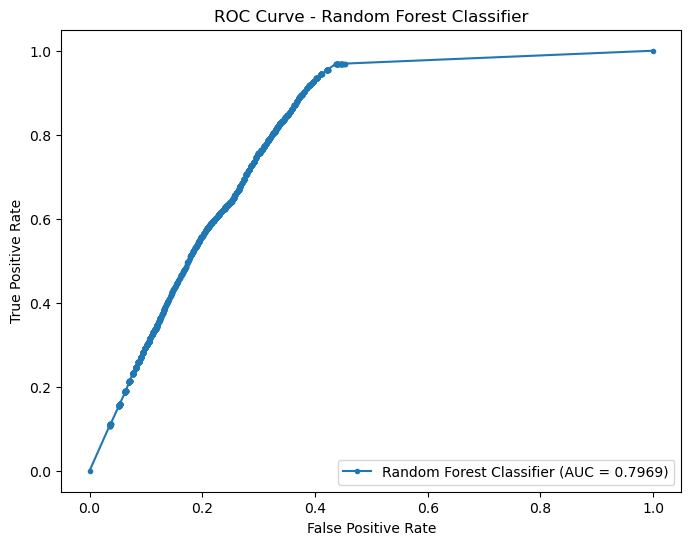

Sensitivity (Recall): 0.7589
Specificity: 0.6279


In [70]:
# Random Forest Classifier model
modelSMOTERF = RandomForestClassifier()
modelSMOTERF.fit(X_train_sm, y_train_sm)

# Predicting using the Random Forest Classifier model
y_pred_SMOTE_RF = modelSMOTERF.predict(X_test)

# Calculating evaluation metrics
acc_RF = accuracy_score(y_test, y_pred_SMOTE_RF)
prec_RF = precision_score(y_test, y_pred_SMOTE_RF)
rec_RF = recall_score(y_test, y_pred_SMOTE_RF)
f1_RF = f1_score(y_test, y_pred_SMOTE_RF)

# Printing the classification report
print("--- Random Forest Classifier ---")
print(classification_report(y_test, y_pred_SMOTE_RF))

# Compute confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_SMOTE_RF, labels=[1, 0])

# Create DataFrame for confusion matrix
df_RF = pd.DataFrame(data=cm_RF, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame
print(df_RF)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_RF, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC
y_prob_RF = modelSMOTERF.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc_RF = roc_auc_score(y_test, y_prob_RF)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_RF)

# Print ROC AUC
print(f"ROC AUC: {roc_auc_RF:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Random Forest Classifier (AUC = %0.4f)' % roc_auc_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity
tn, fp, fn, tp = cm_RF.ravel()
sensitivity = tp / (tp + fn)  # Recall
specificity = tn / (tn + fp)

# Print Sensitivity and Specificity
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


**Compare 4 models - Training**

In [81]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Dictionary to store evaluation metrics
metrics_summary = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Iterate through each model
for model_name, model in models.items():
    # Apply SMOTE to balance the dataset
    sm = SMOTE(random_state=42)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_sm, y_train_sm)
    
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics in summary dictionary
    metrics_summary['Model'].append(model_name)
    metrics_summary['Accuracy'].append(acc)
    metrics_summary['Precision'].append(prec)
    metrics_summary['Recall'].append(rec)
    metrics_summary['F1-Score'].append(f1)

# Create a DataFrame for the summary
df_summary = pd.DataFrame(metrics_summary)

# Print the summary table
print("--- Summary of Model Metrics ---")
print(df_summary)


--- Summary of Model Metrics ---
                      Model  Accuracy  Precision    Recall  F1-Score
0       Logistic Regression  0.644801   0.251415  0.961736  0.398623
1            KNN Classifier  0.716552   0.192402  0.411468  0.262200
2  Decision Tree Classifier  0.754297   0.266242  0.573633  0.363686
3  Random Forest Classifier  0.742988   0.266521  0.627653  0.374161


In [38]:
# Convert confusion matrices to DataFrames
df_cm_logreg = pd.DataFrame(data=cm_smote_log_reg, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
df_cm_KNN = pd.DataFrame(data=cm_smote_KNN, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
df_cm_RF = pd.DataFrame(data=cm_RF, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
df_cm_DT = pd.DataFrame(data=cm_smote_DT, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Combine DataFrames into one DataFrame with multi-level columns
df_cm_combined = pd.concat(
    [df_cm_logreg.add_suffix(' (LogReg)'), df_cm_KNN.add_suffix(' (KNN)'), df_cm_RF.add_suffix(' (RF)'), df_cm_DT.add_suffix(' (DT)')],
    axis=1
)

# Print the combined DataFrame
print("Confusion Matrix Comparison")
print(df_cm_combined)


Confusion Matrix Comparison
          Predicted 1 (LogReg)  Predicted 0 (LogReg)  Predicted 1 (KNN)  \
Actual 1                  8973                   357               3839   
Actual 0                 26717                 40175              16114   

          Predicted 0 (KNN)  Predicted 1 (RF)  Predicted 0 (RF)  \
Actual 1               5491              5860              3470   
Actual 0              50778             16119             50773   

          Predicted 1 (DT)  Predicted 0 (DT)  
Actual 1              5352              3978  
Actual 0             14771             52121  


In [40]:
# Logistic Regression
modelSMOTE_logreg = LogisticRegression()
modelSMOTE_logreg.fit(X_train_sm, y_train_sm)
y_pred_SMOTE_logreg = modelSMOTE_logreg.predict(X_test)
cm_smote_log_reg = confusion_matrix(y_test, y_pred_SMOTE_logreg, labels=[1, 0])
df_cm_logreg = pd.DataFrame(data=cm_smote_log_reg, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
y_prob_logreg = modelSMOTE_logreg.predict_proba(X_test)[:, 1]
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
tn_logreg, fp_logreg, fn_logreg, tp_logreg = cm_smote_log_reg.ravel()
sensitivity_logreg = tp_logreg / (tp_logreg + fn_logreg)
specificity_logreg = tn_logreg / (tn_logreg + fp_logreg)

# KNN Classifier
modelSMOTE_KNN = KNeighborsClassifier()
modelSMOTE_KNN.fit(X_train_sm, y_train_sm)
y_pred_SMOTE_KNN = modelSMOTE_KNN.predict(X_test)
cm_smote_KNN = confusion_matrix(y_test, y_pred_SMOTE_KNN, labels=[1, 0])
df_cm_KNN = pd.DataFrame(data=cm_smote_KNN, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
y_prob_KNN = modelSMOTE_KNN.predict_proba(X_test)[:, 1]
roc_auc_KNN = roc_auc_score(y_test, y_prob_KNN)
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_prob_KNN)
tn_KNN, fp_KNN, fn_KNN, tp_KNN = cm_smote_KNN.ravel()
sensitivity_KNN = tp_KNN / (tp_KNN + fn_KNN)
specificity_KNN = tn_KNN / (tn_KNN + fp_KNN)

# Random Forest Classifier
modelSMOTE_RF = RandomForestClassifier()
modelSMOTE_RF.fit(X_train_sm, y_train_sm)
y_pred_SMOTE_RF = modelSMOTE_RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_pred_SMOTE_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
y_prob_RF = modelSMOTE_RF.predict_proba(X_test)[:, 1]
roc_auc_RF = roc_auc_score(y_test, y_prob_RF)
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_prob_RF)
tn_RF, fp_RF, fn_RF, tp_RF = cm_RF.ravel()
sensitivity_RF = tp_RF / (tp_RF + fn_RF)
specificity_RF = tn_RF / (tn_RF + fp_RF)

# Decision Tree Classifier
modelSMOTE_DT = DecisionTreeClassifier()
modelSMOTE_DT.fit(X_train_sm, y_train_sm)
y_pred_SMOTE_DT = modelSMOTE_DT.predict(X_test)
cm_smote_DT = confusion_matrix(y_test, y_pred_SMOTE_DT, labels=[1, 0])
df_smote_DT = pd.DataFrame(data=cm_smote_DT, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
y_prob_DT = modelSMOTE_DT.predict_proba(X_test)[:, 1]
roc_auc_DT = roc_auc_score(y_test, y_prob_DT)
fpr_DT, tpr_DT, _ = roc_curve(y_test, y_prob_DT)
tn_DT, fp_DT, fn_DT, tp_DT = cm_smote_DT.ravel()
sensitivity_DT = tp_DT / (tp_DT + fn_DT)
specificity_DT = tn_DT / (tn_DT + fp_DT)

# Create a DataFrame to compare Sensitivity, Specificity, and ROC AUC
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN Classifier', 'Random Forest Classifier', 'Decision Tree Classifier'],
    'Sensitivity (Recall)': [sensitivity_logreg, sensitivity_KNN, sensitivity_RF, sensitivity_DT],
    'Specificity': [specificity_logreg, specificity_KNN, specificity_RF, specificity_DT],
    'ROC AUC': [roc_auc_logreg, roc_auc_KNN, roc_auc_RF, roc_auc_DT]
})

# Print the comparison table
print("Model Comparison Summary")
print(metrics_df)

Model Comparison Summary
                      Model  Sensitivity (Recall)  Specificity   ROC AUC
0       Logistic Regression              0.600595     0.961736  0.818068
1            KNN Classifier              0.759104     0.411468  0.639635
2  Random Forest Classifier              0.759134     0.627546  0.797186
3  Decision Tree Classifier              0.779137     0.572562  0.682541


In [98]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l1','l2', 'elasticnet']}

model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

model_logreg_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=1)

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66892
           1       0.25      0.98      0.40      9330

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1         9097          233
Actual 0        27410        39482


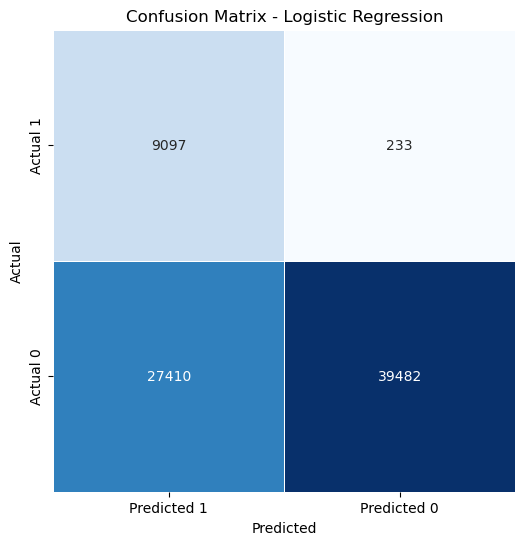

ROC AUC: 0.8267


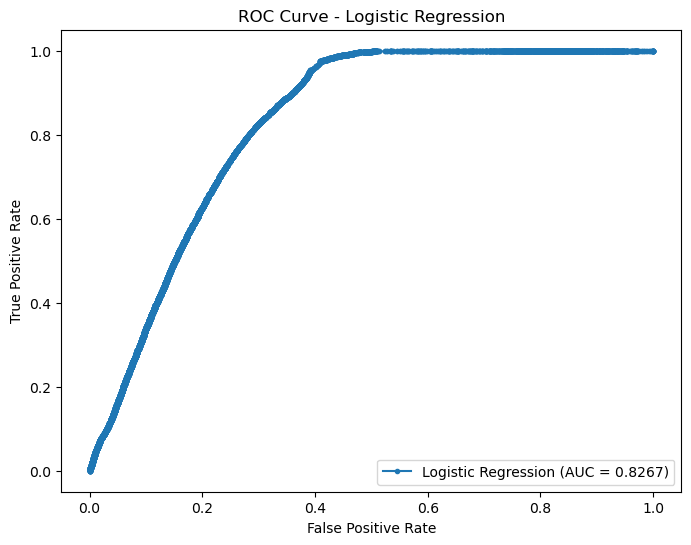

Sensitivity (Recall): 0.5902
Specificity: 0.9750


In [142]:
# Predicting using the best Logistic Regression model
y_pred_logreg = model_logreg_tuned.predict(X_test)

# Calculating evaluation metrics
acc_logreg = accuracy_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
prec_logreg = precision_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Printing the classification report
print("--- Logistic Regression ---")
print(classification_report(y_test, y_pred_logreg))

# Compute confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=[1, 0])

# Create DataFrame for confusion matrix
df_logreg = pd.DataFrame(data=cm_logreg, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame
print("Confusion Matrix:")
print(df_logreg)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_logreg, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, linewidths=0.5)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC
y_prob_logreg = model_logreg_tuned.predict_proba(X_test)[:, 1]
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)

# Print ROC AUC
print(f"ROC AUC: {roc_auc_logreg:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %0.4f)' % roc_auc_logreg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity
tn, fp, fn, tp = cm_logreg.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print Sensitivity and Specificity
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


KNN Tuning

In [148]:
# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV for KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

--- KNN Classifier ---
              precision    recall  f1-score   support

           0       0.91      0.79      0.84     66892
           1       0.22      0.42      0.29      9330

    accuracy                           0.74     76222
   macro avg       0.56      0.61      0.57     76222
weighted avg       0.82      0.74      0.78     76222

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1         3954         5376
Actual 0        14078        52814


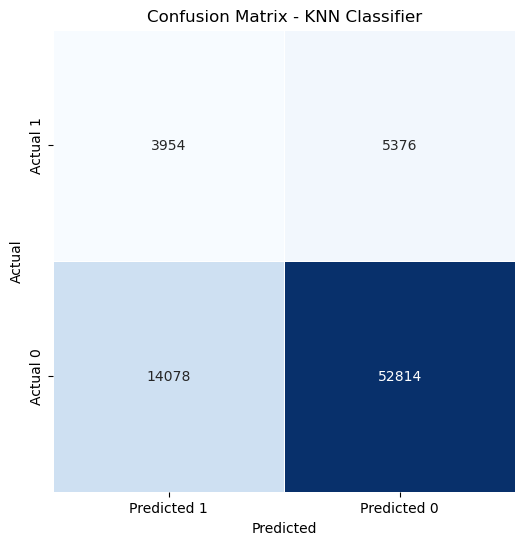

ROC AUC: 0.6752


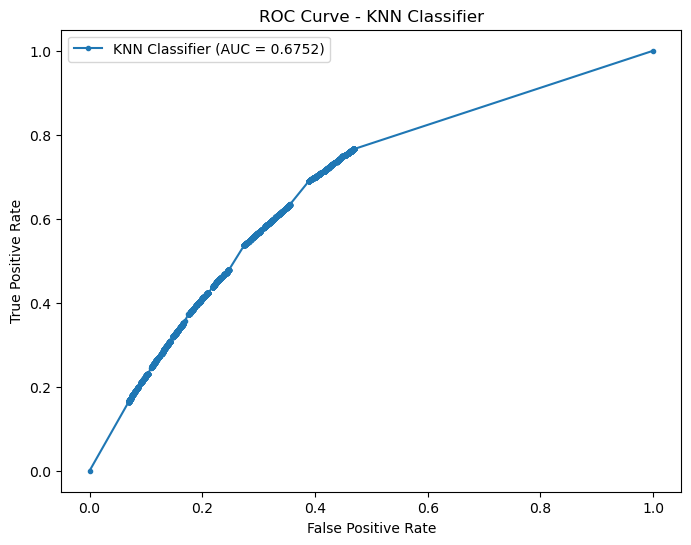

Sensitivity (Recall): 0.7895
Specificity: 0.4238


In [149]:
# Best parameters and model
model_knn_tuned = grid_knn.best_estimator_

# Predicting using the best KNN model
y_pred_knn = model_knn_tuned.predict(X_test)

# Calculating evaluation metrics
acc_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Printing the classification report
print("--- KNN Classifier ---")
print(classification_report(y_test, y_pred_knn))

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=[1, 0])

# Create DataFrame for confusion matrix
df_knn = pd.DataFrame(data=cm_knn, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame
print("Confusion Matrix:")
print(df_knn)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_knn, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, linewidths=0.5)
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC
y_prob_knn = model_knn_tuned.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)

# Print ROC AUC
print(f"ROC AUC: {roc_auc_knn:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='KNN Classifier (AUC = %0.4f)' % roc_auc_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity
tn, fp, fn, tp = cm_knn.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print Sensitivity and Specificity
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Decision Tree

In [152]:
# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 4, 9, 15, 20, 50],
    'min_samples_leaf': [1, 4, 0.1, 2, 10],
    'max_features': [None, 0.2, 0.8, 2.0],
    'min_samples_split': [2, 9, 15, 25]
}

# Perform GridSearchCV for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train_sm, y_train_sm)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_par

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 4, 9, 15, 20, 50],
                         'max_features': [None, 0.2, 0.8, 2.0],
                         'min_samples_leaf': [1, 4, 0.1, 2, 10],
                         'min_samples_split': [2, 9, 15, 25]},
             scoring='accuracy')

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     66892
           1       0.27      0.62      0.37      9330

    accuracy                           0.75     76222
   macro avg       0.60      0.69      0.61     76222
weighted avg       0.85      0.75      0.78     76222

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1         5754         3576
Actual 0        15707        51185


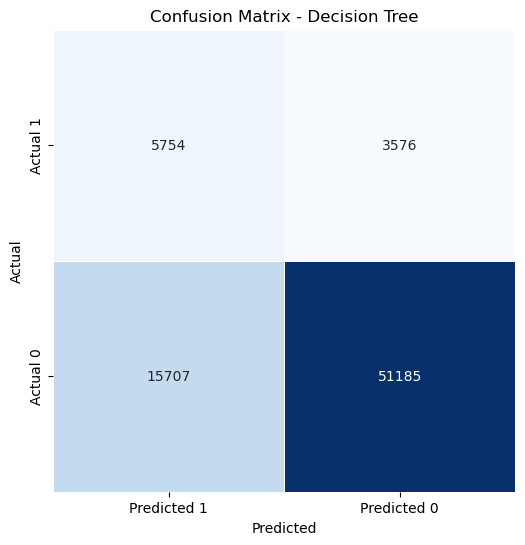

ROC AUC: 0.6991


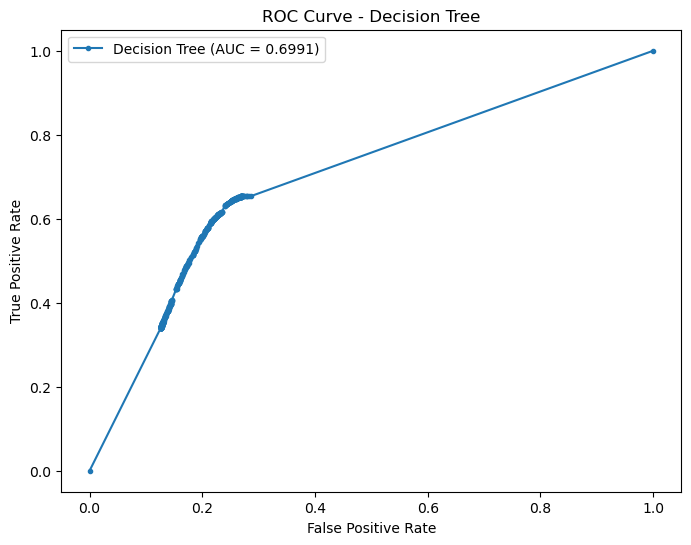

Sensitivity (Recall): 0.7652
Specificity: 0.6167


In [153]:
# Best parameters and model
model_dt_tuned = grid_dt.best_estimator_

# Predicting using the best Decision Tree model
y_pred_dt = model_dt_tuned.predict(X_test)

# Calculating evaluation metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Printing the classification report
print("--- Decision Tree ---")
print(classification_report(y_test, y_pred_dt))

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[1, 0])

# Create DataFrame for confusion matrix
df_dt = pd.DataFrame(data=cm_dt, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame
print("Confusion Matrix:")
print(df_dt)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_dt, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, linewidths=0.5)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC
y_prob_dt = model_dt_tuned.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)

# Print ROC AUC
print(f"ROC AUC: {roc_auc_dt:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Decision Tree (AUC = %0.4f)' % roc_auc_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity
tn, fp, fn, tp = cm_dt.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print Sensitivity and Specificity
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Random Forest

In [76]:
RF_tuning = RandomForestClassifier()
param_DT =  {
    "n_estimators":[100,500,1000],
    "max_depth": [None, 4,6,8],
    "min_samples_leaf": [1,0.06,3,5],
    "min_samples_split" : [2,9,15,25],
    "max_features" : ['auto','sqrt', 'log2'],
    "criterion": ['gini', 'entropy']}
model_RF_tuned = RandomizedSearchCV(estimator=RF_tuning, param_distributions=param_DT,scoring = 'recall', verbose = 1, n_jobs = -1,cv = 3)
model_RF_tuned.fit(X_train_sm,y_train_sm)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 0.06, 3, 5],
                                        'min_samples_split': [2, 9, 15, 25],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='recall', verbose=1)

In [ ]:
# Define parameter grid for Random Forest
param_RF = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 4, 6, 8],
    'min_samples_leaf': [1, 0.06, 3, 5],
    'min_samples_split': [2, 9, 15, 25],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Perform RandomizedSearchCV for Random Forest
RF_tuning = RandomForestClassifier()
model_RF_tuned = RandomizedSearchCV(estimator=RF_tuning, param_distributions=param_RF, scoring='recall', verbose=1, n_jobs=-1, cv=3)
model_RF_tuned.fit(X_train_sm, y_train_sm)

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.99      0.64      0.78     66892
           1       0.27      0.94      0.41      9330

    accuracy                           0.68     76222
   macro avg       0.63      0.79      0.60     76222
weighted avg       0.90      0.68      0.73     76222

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1         8731          599
Actual 0        24106        42786


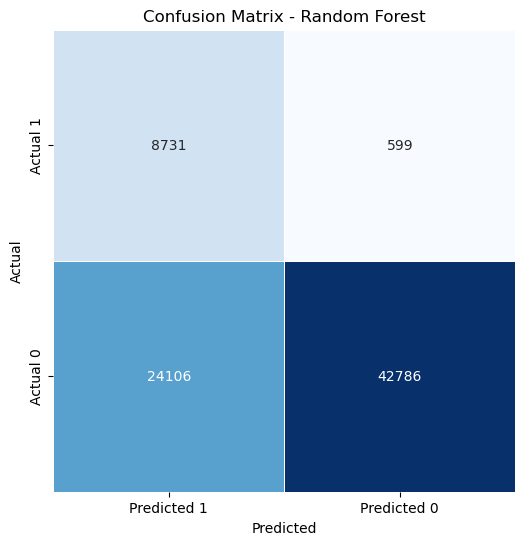

ROC AUC: 0.8379


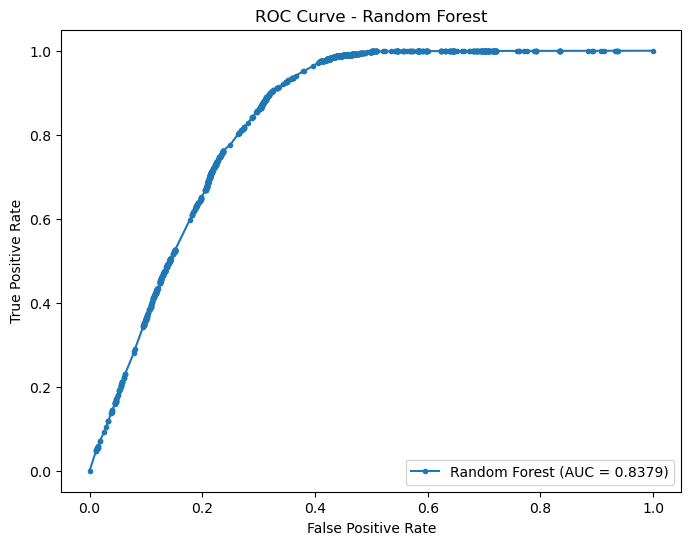

Sensitivity (Recall): 0.6396
Specificity: 0.9358


In [78]:
# Best parameters and model
best_rf = model_RF_tuned.best_estimator_

# Predicting using the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Calculating evaluation metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Printing the classification report
print("--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])

# Create DataFrame for confusion matrix
df_rf = pd.DataFrame(data=cm_rf, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Printing the confusion matrix DataFrame
print("Confusion Matrix:")
print(df_rf)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_rf, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, linewidths=0.5)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC AUC
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Print ROC AUC
print(f"ROC AUC: {roc_auc_rf:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Random Forest (AUC = %0.4f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

# Calculate Sensitivity and Specificity
tn, fp, fn, tp = cm_rf.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print Sensitivity and Specificity
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Evaluation

In [98]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Assuming X_train, y_train, X_test, and y_test are already defined

# Initialize models with hyperparameters
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
                'penalty': ['l1', 'l2', 'elasticnet']}

knn_tuning = KNeighborsClassifier()
param_knn = {'n_neighbors': [5, 7, 9],
             'weights': ['uniform', 'distance'],
             'p': [1, 2]}

dt_tuning = DecisionTreeClassifier()
param_dt = {'max_depth': [None, 4, 9, 15, 20, 50],
            'min_samples_leaf': [1, 4, 0.1, 2, 10],
            'max_features': [None, 0.2, 0.8, 2.0],
            'min_samples_split': [2, 9, 15, 25]}

rf_tuning = RandomForestClassifier()
param_rf = {'n_estimators': [100, 500, 1000],
            'max_depth': [None, 4, 6, 8],
            'min_samples_leaf': [1, 0.06, 3, 5],
            'min_samples_split': [2, 9, 15, 25],
            'max_features': ['auto', 'sqrt', 'log2'],
            'criterion': ['gini', 'entropy']}

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Dictionary to store evaluation metrics
metrics_summary = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Logistic Regression
model_logreg_tuned = GridSearchCV(estimator=logreg_tuning, param_grid=param_logreg, cv=3, n_jobs=-1, verbose=1, scoring='recall')
model_logreg_tuned.fit(X_train_sm, y_train_sm)
y_pred_logreg = model_logreg_tuned.predict(X_test)
metrics_summary['Model'].append('Logistic Regression')
metrics_summary['Accuracy'].append(accuracy_score(y_test, y_pred_logreg))
metrics_summary['Precision'].append(precision_score(y_test, y_pred_logreg))
metrics_summary['Recall'].append(recall_score(y_test, y_pred_logreg))
metrics_summary['F1-Score'].append(f1_score(y_test, y_pred_logreg))

# KNN Classifier
model_knn_tuned = GridSearchCV(estimator=knn_tuning, param_grid=param_knn, cv=5, scoring='accuracy')
model_knn_tuned.fit(X_train_sm, y_train_sm)
y_pred_knn = model_knn_tuned.predict(X_test)
metrics_summary['Model'].append('KNN Classifier')
metrics_summary['Accuracy'].append(accuracy_score(y_test, y_pred_knn))
metrics_summary['Precision'].append(precision_score(y_test, y_pred_knn))
metrics_summary['Recall'].append(recall_score(y_test, y_pred_knn))
metrics_summary['F1-Score'].append(f1_score(y_test, y_pred_knn))

# Decision Tree Classifier
model_dt_tuned = GridSearchCV(estimator=dt_tuning, param_grid=param_dt, cv=5, scoring='accuracy')
model_dt_tuned.fit(X_train_sm, y_train_sm)
y_pred_dt = model_dt_tuned.predict(X_test)
metrics_summary['Model'].append('Decision Tree Classifier')
metrics_summary['Accuracy'].append(accuracy_score(y_test, y_pred_dt))
metrics_summary['Precision'].append(precision_score(y_test, y_pred_dt))
metrics_summary['Recall'].append(recall_score(y_test, y_pred_dt))
metrics_summary['F1-Score'].append(f1_score(y_test, y_pred_dt))

# Random Forest Classifier
model_rf_tuned = RandomizedSearchCV(estimator=rf_tuning, param_distributions=param_rf, scoring='recall', verbose=1, n_jobs=-1, cv=3)
model_rf_tuned.fit(X_train_sm, y_train_sm)
y_pred_rf = model_rf_tuned.predict(X_test)
metrics_summary['Model'].append('Random Forest Classifier')
metrics_summary['Accuracy'].append(accuracy_score(y_test, y_pred_rf))
metrics_summary['Precision'].append(precision_score(y_test, y_pred_rf))
metrics_summary['Recall'].append(recall_score(y_test, y_pred_rf))
metrics_summary['F1-Score'].append(f1_score(y_test, y_pred_rf))

# Create a DataFrame for the summary
df_summary = pd.DataFrame(metrics_summary)

# Print the summary table
print("--- Summary of Model Metrics ---")
print(df_summary)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

Fitting 3 folds for each of 10 candidates, totalling 30 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
13 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramete

--- Summary of Model Metrics ---
                      Model  Accuracy  Precision    Recall  F1-Score
0       Logistic Regression  0.637336   0.249185  0.975027  0.396928
1            KNN Classifier  0.744772   0.219277  0.423794  0.289014
2  Decision Tree Classifier  0.747278   0.268817  0.618971  0.374842
3  Random Forest Classifier  0.676852   0.266347  0.934727  0.414565


In [100]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Convert confusion matrices to DataFrames
cm_logreg = confusion_matrix(y_test, model_logreg_tuned.predict(X_test), labels=[1, 0])
cm_knn = confusion_matrix(y_test, model_knn_tuned.predict(X_test), labels=[1, 0])
cm_rf = confusion_matrix(y_test, model_rf_tuned.predict(X_test), labels=[1, 0])
cm_dt = confusion_matrix(y_test, model_dt_tuned.predict(X_test), labels=[1, 0])

df_cm_logreg = pd.DataFrame(data=cm_logreg, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
df_cm_knn = pd.DataFrame(data=cm_knn, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
df_cm_rf = pd.DataFrame(data=cm_rf, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
df_cm_dt = pd.DataFrame(data=cm_dt, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])

# Combine DataFrames into one DataFrame with multi-level columns
df_cm_combined = pd.concat(
    [df_cm_logreg.add_suffix(' (LogReg)'), df_cm_knn.add_suffix(' (KNN)'), df_cm_rf.add_suffix(' (RF)'), df_cm_dt.add_suffix(' (DT)')],
    axis=1
)

# Print the combined DataFrame
print("Confusion Matrix Comparison")
print(df_cm_combined)


Confusion Matrix Comparison
          Predicted 1 (LogReg)  Predicted 0 (LogReg)  Predicted 1 (KNN)  \
Actual 1                  9097                   233               3954   
Actual 0                 27410                 39482              14078   

          Predicted 0 (KNN)  Predicted 1 (RF)  Predicted 0 (RF)  \
Actual 1               5376              8721               609   
Actual 0              52814             24022             42870   

          Predicted 1 (DT)  Predicted 0 (DT)  
Actual 1              5775              3555  
Actual 0             15708             51184  


In [102]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve

# Dictionary to store detailed evaluation metrics
detailed_metrics_summary = {
    'Model': [],
    'Sensitivity (Recall)': [],
    'Specificity': [],
    'ROC AUC': []
}

# Logistic Regression
y_prob_logreg = model_logreg_tuned.predict_proba(X_test)[:, 1]
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
tn_logreg, fp_logreg, fn_logreg, tp_logreg = cm_logreg.ravel()
sensitivity_logreg = tp_logreg / (tp_logreg + fn_logreg)
specificity_logreg = tn_logreg / (tn_logreg + fp_logreg)
detailed_metrics_summary['Model'].append('Logistic Regression')
detailed_metrics_summary['Sensitivity (Recall)'].append(sensitivity_logreg)
detailed_metrics_summary['Specificity'].append(specificity_logreg)
detailed_metrics_summary['ROC AUC'].append(roc_auc_logreg)

# KNN Classifier
y_prob_knn = model_knn_tuned.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()
sensitivity_knn = tp_knn / (tp_knn + fn_knn)
specificity_knn = tn_knn / (tn_knn + fp_knn)
detailed_metrics_summary['Model'].append('KNN Classifier')
detailed_metrics_summary['Sensitivity (Recall)'].append(sensitivity_knn)
detailed_metrics_summary['Specificity'].append(specificity_knn)
detailed_metrics_summary['ROC AUC'].append(roc_auc_knn)

# Random Forest Classifier
y_prob_rf = model_rf_tuned.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
sensitivity_rf = tp_rf / (tp_rf + fn_rf)
specificity_rf = tn_rf / (tn_rf + fp_rf)
detailed_metrics_summary['Model'].append('Random Forest Classifier')
detailed_metrics_summary['Sensitivity (Recall)'].append(sensitivity_rf)
detailed_metrics_summary['Specificity'].append(specificity_rf)
detailed_metrics_summary['ROC AUC'].append(roc_auc_rf)

# Decision Tree Classifier
y_prob_dt = model_dt_tuned.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
sensitivity_dt = tp_dt / (tp_dt + fn_dt)
specificity_dt = tn_dt / (tn_dt + fp_dt)
detailed_metrics_summary['Model'].append('Decision Tree Classifier')
detailed_metrics_summary['Sensitivity (Recall)'].append(sensitivity_dt)
detailed_metrics_summary['Specificity'].append(specificity_dt)
detailed_metrics_summary['ROC AUC'].append(roc_auc_dt)

# Create a DataFrame for the detailed summary
df_detailed_summary = pd.DataFrame(detailed_metrics_summary)

# Print the detailed summary table
print("--- Detailed Model Metrics Summary ---")
print(df_detailed_summary)


--- Detailed Model Metrics Summary ---
                      Model  Sensitivity (Recall)  Specificity   ROC AUC
0       Logistic Regression              0.590235     0.975027  0.826707
1            KNN Classifier              0.789541     0.423794  0.675216
2  Random Forest Classifier              0.640884     0.934727  0.838903
3  Decision Tree Classifier              0.765174     0.618971  0.700553
